### Importation of required packages to be used

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import statsmodels.formula.api as ols
import statsmodels.api as sm
from scipy import stats
%matplotlib inline
pd.set_option("display.max_columns",None)

### Bring data into jupyter notebook

In [2]:
data=pd.read_csv('C:/Users/hp user/Downloads/Assignment_3_LinearRegression_Statistical_Way/Boston.csv',index_col=0)

In [3]:
type(data)

pandas.core.frame.DataFrame

### Objective: is to predict the value of prices of the house where medv is considered as respondent variable and others as potential regressors

#### Data understanding and exploration

In [4]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
#number or rows and columns we have in our dataset
data.shape

(506, 14)

In [6]:
data.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [7]:
#Distribution of my data types
data.dtypes.value_counts()

float64    11
int64       3
dtype: int64

In [8]:
#scolumns names in my dataset
data.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [9]:
#There is no missing value in our dataset
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

### First model

In [10]:
from statsmodels.formula.api import ols

#### Remove unnecessary columns

In [11]:
data1=data.drop(['black'],axis=1)

In [12]:
data1.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [13]:
data1.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
lstat      float64
medv       float64
dtype: object

In [14]:
# All columns have been changed in uppercase
data1.columns = map(lambda x: str(x).upper(), data1.columns)

In [15]:
data1.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

In [16]:
data1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [17]:
model_1=ols("MEDV~CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+LSTAT",data=data1).fit()

In [18]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.5
Date:                Wed, 06 May 2020   Prob (F-statistic):          2.23e-133
Time:                        19:45:02   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.6173      4.936      8.431      0.000      31.919      51.316
CRIM          -0.1214      0.033     -3.678      0.000      -0.186      -0.057
ZN             0.0470      0.014      3.384      0.001       0.020       0.074
INDUS          0.0135      0.062      0.217      0.829      -0.109       0.136
CHAS           2.8400      0.870      3.264      0.001       1.131       4.549
NOX          -18.7580      3.851     -4.870      0.000     -26.325     -11.191
RM             3.6581      0.420      8.705      0.000       2.832       4.484
AGE            0.0036      0.013      0.271      0.787      -0.023       0.030
DIS           -1.4908      0.202     -7.394      0.000      -1.887      -1.095
RAD            0.2894      0.067      4.325      0.000       0.158       0.421
TAX           -0.0127      0.004     -3.337      0.001      -0.020      -0.005
PTRATIO       -0.9375      0.132     -7.091      0.000      -1.197      -0.678
LSTAT         -0.5520      0.051    -10.897      0.000      -0.652      -0.452
==============================================================================
Omnibus:                      171.096   Durbin-Watson:                   1.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              709.937
Skew:                           1.477   Prob(JB):                    6.90e-155
Kurtosis:                       7.995   Cond. No.                     1.17e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Ols assumptions were cheched to see if model can be improved or not

In [19]:
def regression_residual_plots(model_fit, dependent_var, data, size = [10,10]):
    """
    This function requires:
        import matplotlib.pyplot as plt
        import statsmodels.api as sm
    
    Arguments:
    model_fit: It takes a fitted model as input.
        Obtainable through Statsmodels regression: 
            model_fit = sm.OLS(endog= DEPENDENT VARIABLE, exog= INDEPENDENT VARIABLE).fit()
    dependent_var: string of the pandas column used as the model dependent variable.
    data: pandas dataset where the dependent variable is located. The model data.
    size: default [10,10]. Updates the [width, height], inputed in matplotlibs figsize = [10,10]
        
    Ive only run it on simple, non-robust, ordinary least squares models,
    but these metrics are standard for linear models.
    """
    
    # Extract relevant regression output for plotting
    # fitted values (need a constant term for intercept)
    model_fitted_y = model_fit.fittedvalues
    # model residuals
    model_residuals = model_fit.resid
    # normalized residuals
    model_norm_residuals = model_fit.get_influence().resid_studentized_internal
    # absolute squared normalized residuals
    model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
    # absolute residuals
    model_abs_resid = np.abs(model_residuals)
    # leverage, from statsmodels internals
    model_leverage = model_fit.get_influence().hat_matrix_diag
    # cook's distance, from statsmodels internals
    model_cooks = model_fit.get_influence().cooks_distance[0]

    ########################################################################
    # Plot Size
    fig = plt.figure(figsize=size)
    
    # Residual vs. Fitted
    ax = fig.add_subplot(2, 2, 1) # Top Left
    sns.residplot(model_fitted_y, dependent_var, data=data, 
                              lowess=True, 
                              scatter_kws={'alpha': 0.5}, 
                              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
                 ax=ax)
    ax.set_title('Residuals vs Fitted')
    ax.set_xlabel('Fitted values')
    ax.set_ylabel('Residuals')

    # Annotations of Outliers
    abs_resid = model_abs_resid.sort_values(ascending=False)
    abs_resid_top_3 = abs_resid[:3]
    for i in abs_resid_top_3.index:
        ax.annotate(i, xy=(model_fitted_y[i], model_residuals[i]));

    ########################################################################
    # Normal Q-Q
    ax = fig.add_subplot(2, 2, 2) # Top Right
    QQ = sm.ProbPlot(model_norm_residuals)
    QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1, ax=ax)
    ax.set_title('Normal Q-Q')
    ax.set_xlabel('Theoretical Quantiles')
    ax.set_ylabel('Standardized Residuals')

    # Annotations of Outliers
    abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
    abs_norm_resid_top_3 = abs_norm_resid[:3]
    for r, i in enumerate(abs_norm_resid_top_3):
        ax.annotate(i, xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                model_norm_residuals[i]));

    ########################################################################
    # Scale-Location Plot
    ax = fig.add_subplot(2, 2, 3) # Bottom Left
    plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
    sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, 
                scatter=False, 
                ci=False, 
                lowess=True,
                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}, ax=ax)
    ax.set_title('Scale-Location')
    ax.set_xlabel('Fitted values')
    ax.set_ylabel('$\sqrt{|Standardized Residuals|}$');
    # Annotations of Outliers
    abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
    abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
    for i in abs_norm_resid_top_3:
        ax.annotate(i, 
                                   xy=(model_fitted_y[i], 
                                       model_norm_residuals_abs_sqrt[i]));

    ########################################################################  
    # Cook's Distance Plot
    ax = fig.add_subplot(2, 2, 4) # Bottom Right
    plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
    sns.regplot(model_leverage, model_norm_residuals, 
                scatter=False, 
                ci=False, 
                lowess=True,
                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
               ax=ax)
    ax.set_xlim(0, 0.20)
    ax.set_ylim(-3, 5)
    ax.set_title('Residuals vs Leverage')
    ax.set_xlabel('Leverage')
    ax.set_ylabel('Standardized Residuals')
    
    # Annotations
    leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
    for i in leverage_top_3:
        ax.annotate(i, xy=(model_leverage[i],model_norm_residuals[i]))

    # Shenanigans for Cook's distance contours
    def graph(formula, x_range, label=None):
        x = x_range
        y = formula(x)
        plt.plot(x, y, label=label, lw=1, ls='--', color='red')
    p = len(model_fit.params) # number of model parameters
    graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
          np.linspace(0.001, 0.200, 50), 
          'Cook\'s distance') # 0.5 line
    graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
          np.linspace(0.001, 0.200, 50)) # 1 line
    plt.legend(loc='upper right')
    plt.savefig('residual_plots.png',bbox_inches='tight')
    plt.show()         

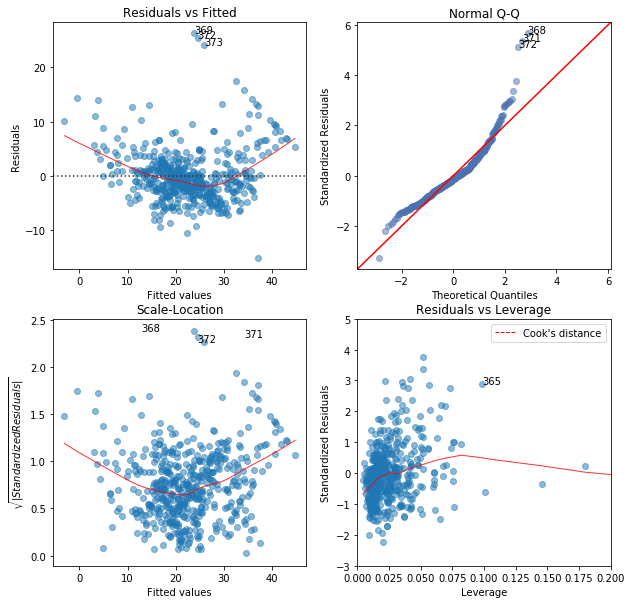

In [20]:
regression_residual_plots(model_1,'MEDV',data1)

### 1) Linearity : Residual - Fitted

Linear regression needs the relationship between the independent and dependent variables to be linear. Let's use a pair plot to check the relation of independent variables with the MEDV variable


In [21]:
#in residual-fitted plot there is small kind of pattern therefore linearity doesn't obey 100%
#from here model can be improved
data1.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
LSTAT      float64
MEDV       float64
dtype: object

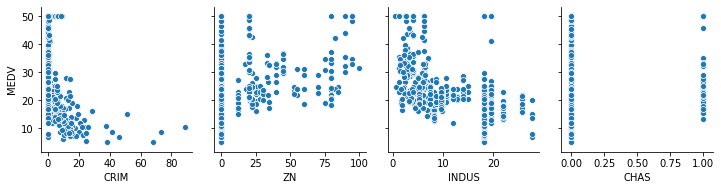

In [22]:
sns.pairplot(data1,x_vars=['CRIM','ZN','INDUS','CHAS'],y_vars='MEDV')

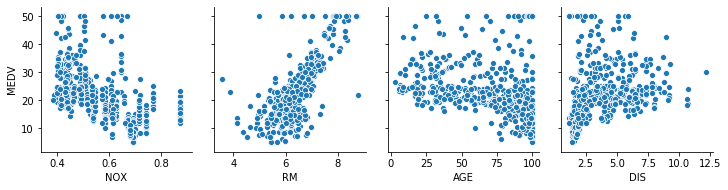

In [23]:
sns.pairplot(data1,x_vars=['NOX','RM','AGE','DIS'],y_vars='MEDV')

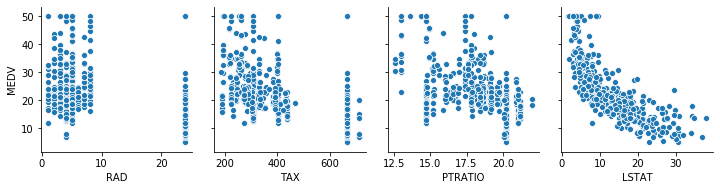

In [24]:
sns.pairplot(data1,x_vars=['RAD','TAX','PTRATIO','LSTAT'],y_vars='MEDV')

RM and LSTAT are the ones that have linear relationship.

Let introduce the AGE^2, ZN^2 and TAX^2:to capture the non-linearity


In [25]:
data2=data1.copy()
data2['AGE_sq']=data1['AGE']**2
data2['ZN_sq']=data1['ZN']**2
data2['TAX_sq']=data1['TAX']**2
data2['NOX_sq']=data1['NOX']**2

In [26]:
data2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_sq,ZN_sq,TAX_sq,NOX_sq
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,4251.04,324.0,87616,0.289444
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,6225.21,0.0,58564,0.219961
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,3733.21,0.0,58564,0.219961
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,2097.64,0.0,49284,0.209764
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,2937.64,0.0,49284,0.209764


In [27]:
model_2=ols("MEDV~CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+LSTAT+AGE_sq+ZN_sq+TAX_sq+NOX_sq",data=data2).fit()

In [28]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     88.02
Date:                Wed, 06 May 2020   Prob (F-statistic):          1.57e-132
Time:                        19:45:06   Log-Likelihood:                -1497.2
No. Observations:                 506   AIC:                             3028.
Df Residuals:                     489   BIC:                             3100.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.5173      9.724      4.270      0.000      22.412      60.623
CRIM          -0.1328      0.033     -4.043      0.000      -0.197      -0.068
ZN            -0.0182      0.037     -0.498      0.619      -0.090       0.054
INDUS         -0.0528      0.064     -0.821      0.412      -0.179       0.074
CHAS           3.0664      0.868      3.532      0.000       1.360       4.772
NOX           15.5902     27.621      0.564      0.573     -38.681      69.861
RM             3.4931      0.419      8.343      0.000       2.670       4.316
AGE           -0.1194      0.044     -2.734      0.006      -0.205      -0.034
DIS           -1.2985      0.219     -5.939      0.000      -1.728      -0.869
RAD            0.2265      0.083      2.727      0.007       0.063       0.390
TAX           -0.0345      0.012     -2.799      0.005      -0.059      -0.010
PTRATIO       -1.0489      0.137     -7.665      0.000      -1.318      -0.780
LSTAT         -0.5724      0.051    -11.274      0.000      -0.672      -0.473
AGE_sq         0.0010      0.000      2.862      0.004       0.000       0.002
ZN_sq          0.0007      0.000      1.776      0.076    -7.7e-05       0.002
TAX_sq      2.715e-05   1.55e-05      1.756      0.080   -3.23e-06    5.75e-05
NOX_sq       -26.2845     20.634     -1.274      0.203     -66.827      14.258
==============================================================================
Omnibus:                      158.245   Durbin-Watson:                   1.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              602.223
Skew:                           1.387   Prob(JB):                    1.69e-131
Kurtosis:                       7.568   Cond. No.                     4.20e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.2e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### NOTE:Previously Accuracy is .728 and with non-linearity handing : 0.734

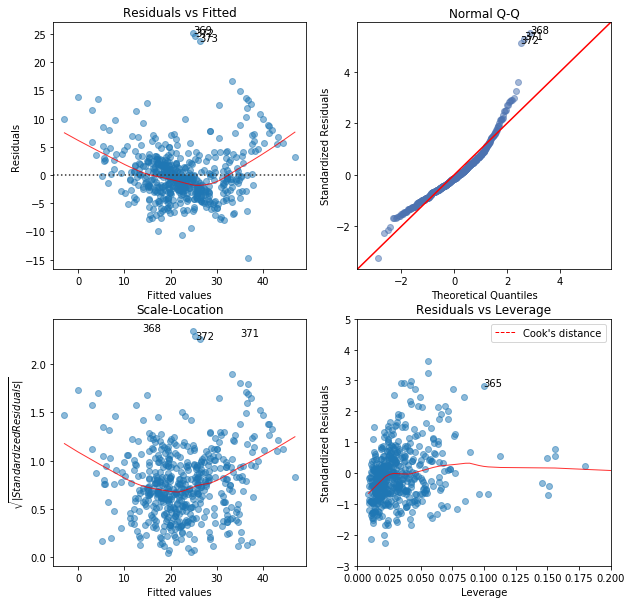

In [29]:
regression_residual_plots(model_2,'MEDV',data2)

### 2. Normality : Normal Q-Q plot

Normality of each variable in my dataset have been cheched and Z-score was used to eliminate outliers

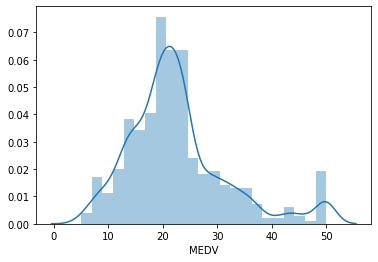

In [30]:
sns.distplot(data2['MEDV'],kde=True)

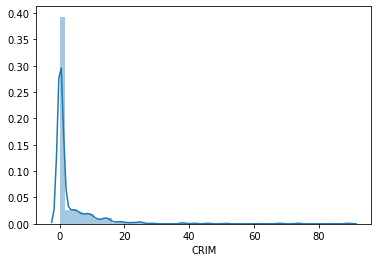

In [31]:
sns.distplot(data2['CRIM'],kde=True)

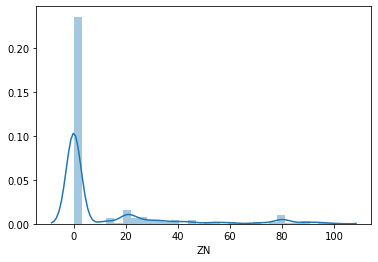

In [32]:
sns.distplot(data2['ZN'],kde=True)

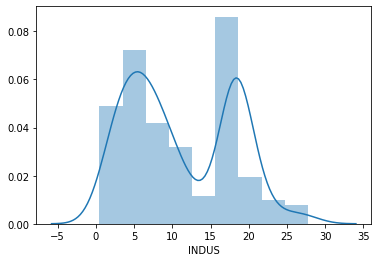

In [33]:
sns.distplot(data2['INDUS'],kde=True)

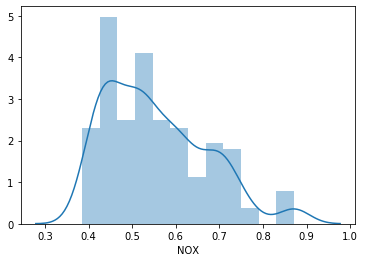

In [34]:
sns.distplot(data2['NOX'],kde=True)

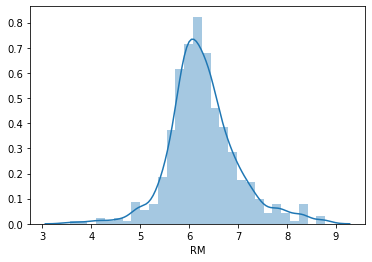

In [35]:
sns.distplot(data2['RM'],kde=True)

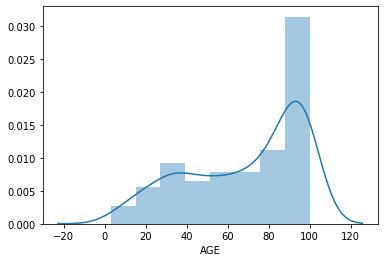

In [36]:
sns.distplot(data2['AGE'],kde=True)

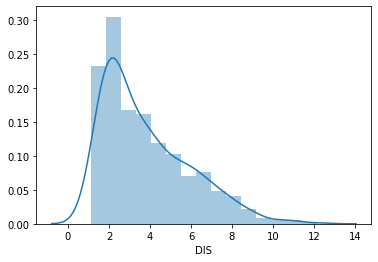

In [37]:
sns.distplot(data2['DIS'],kde=True)

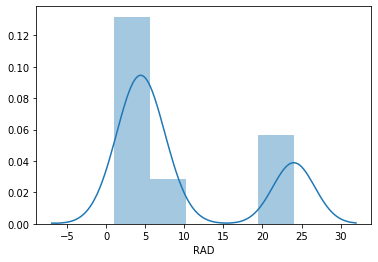

In [38]:
sns.distplot(data2['RAD'],kde=True)

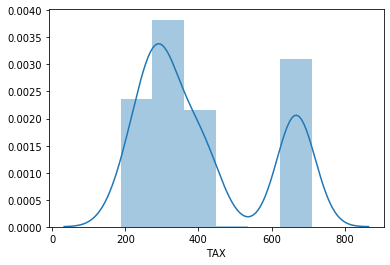

In [39]:
sns.distplot(data2['TAX'],kde=True)

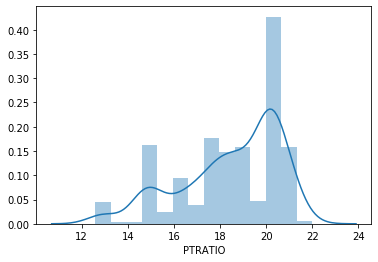

In [40]:
sns.distplot(data2['PTRATIO'],kde=True)

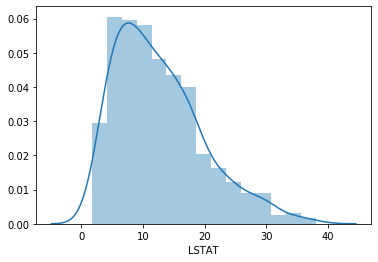

In [41]:
sns.distplot(data2['LSTAT'],kde=True)

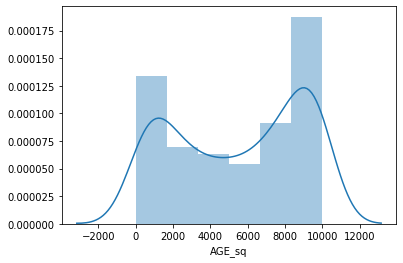

In [42]:
sns.distplot(data2['AGE_sq'],kde=True)

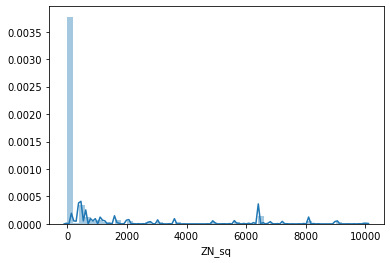

In [43]:
sns.distplot(data2['ZN_sq'],kde=True)

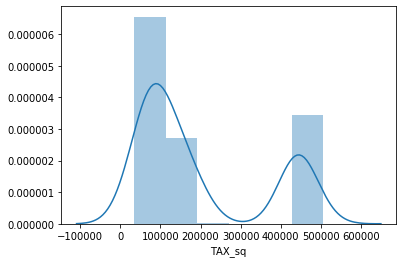

In [44]:
sns.distplot(data2['TAX_sq'],kde=True)

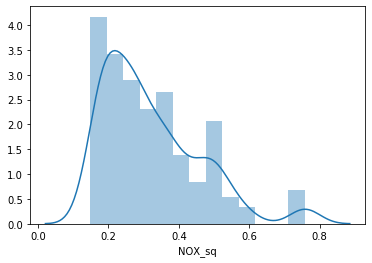

In [45]:
sns.distplot(data2['NOX_sq'],kde=True)

In [46]:
#As many independent variables are unnormal distributed,i have try to bring normality by removing outliers within the dataset
data3=data2[(np.abs(stats.zscore(data2)) < 3).all(axis=1)]

In [47]:
data3.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_sq,ZN_sq,TAX_sq,NOX_sq
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,4251.04,324.0,87616,0.289444
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,6225.21,0.0,58564,0.219961
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,3733.21,0.0,58564,0.219961
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,2097.64,0.0,49284,0.209764
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,2937.64,0.0,49284,0.209764


In [48]:
data3.shape

(411, 17)

In [49]:
model_3=ols("MEDV~CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+LSTAT+AGE_sq+ZN_sq+TAX_sq+NOX_sq",data=data3).fit()

In [50]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     78.02
Date:                Wed, 06 May 2020   Prob (F-statistic):          6.08e-108
Time:                        19:45:11   Log-Likelihood:                -1163.7
No. Observations:                 411   AIC:                             2359.
Df Residuals:                     395   BIC:                             2424.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.1177     11.974      1.513      0.131      -5.422      41.657
CRIM          -0.1753      0.074     -2.355      0.019      -0.322      -0.029
ZN             0.0179      0.044      0.409      0.683      -0.068       0.104
INDUS         -0.0313      0.060     -0.524      0.601      -0.149       0.086
CHAS         3.12e-13   4.72e-13      0.662      0.509   -6.15e-13    1.24e-12
NOX           62.6806     36.913      1.698      0.090      -9.890     135.251
RM             4.2978      0.472      9.109      0.000       3.370       5.225
AGE           -0.0814      0.042     -1.960      0.051      -0.163       0.000
DIS           -1.0423      0.231     -4.517      0.000      -1.496      -0.589
RAD            0.2055      0.082      2.511      0.012       0.045       0.366
TAX           -0.0330      0.012     -2.816      0.005      -0.056      -0.010
PTRATIO       -0.9032      0.136     -6.630      0.000      -1.171      -0.635
LSTAT         -0.5526      0.057     -9.705      0.000      -0.665      -0.441
AGE_sq         0.0006      0.000      1.757      0.080   -7.38e-05       0.001
ZN_sq         -0.0002      0.001     -0.237      0.812      -0.002       0.001
TAX_sq      2.758e-05   1.45e-05      1.900      0.058    -9.6e-07    5.61e-05
NOX_sq       -67.0285     30.757     -2.179      0.030    -127.496      -6.561
==============================================================================
Omnibus:                      185.664   Durbin-Watson:                   1.197
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1359.375
Skew:                           1.771   Prob(JB):                    6.54e-296
Kurtosis:                      11.176   Cond. No.                     1.12e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.1e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### NOTE:Previously Accuracy is .734 and with the improvement of normal distribution we got : 0.738

### 3. Homoskedasticity : Scale-Location plot

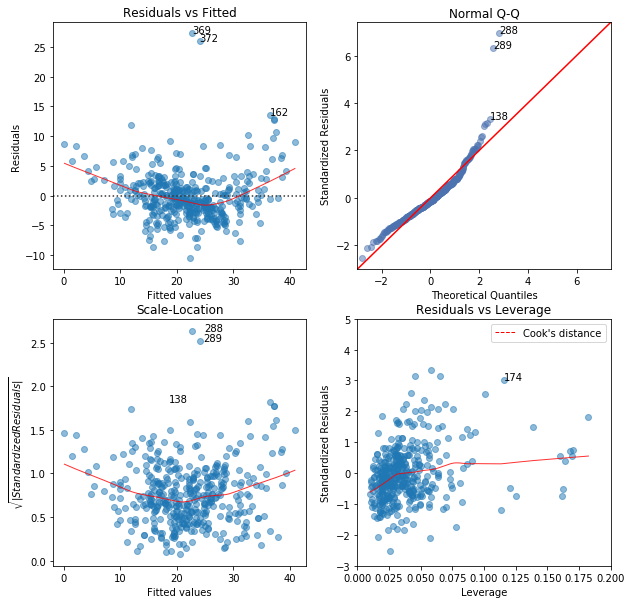

In [51]:
regression_residual_plots(model_3,'MEDV',data3)

#### N.B: There is a bit of pattern

In [52]:
data4=data3.copy()
data4['MEDV']=np.sqrt(data3['MEDV'])

In [53]:
data3.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_sq,ZN_sq,TAX_sq,NOX_sq
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,4251.04,324.0,87616,0.289444
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,6225.21,0.0,58564,0.219961
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,3733.21,0.0,58564,0.219961
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,2097.64,0.0,49284,0.209764
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,2937.64,0.0,49284,0.209764


In [54]:
data4.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_sq,ZN_sq,TAX_sq,NOX_sq
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,4.898979,4251.04,324.0,87616,0.289444
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,4.647580,6225.21,0.0,58564,0.219961
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,5.890671,3733.21,0.0,58564,0.219961
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,5.779273,2097.64,0.0,49284,0.209764
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,6.016644,2937.64,0.0,49284,0.209764


In [55]:
model_4=ols("MEDV~CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+LSTAT+AGE_sq+ZN_sq+TAX_sq+NOX_sq",data=data4).fit()

In [56]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     93.74
Date:                Wed, 06 May 2020   Prob (F-statistic):          7.39e-120
Time:                        19:45:13   Log-Likelihood:                -206.14
No. Observations:                 411   AIC:                             444.3
Df Residuals:                     395   BIC:                             508.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.5493      1.165      3.905      0.000       2.259       6.840
CRIM          -0.0292      0.007     -4.038      0.000      -0.043      -0.015
ZN             0.0016      0.004      0.374      0.708      -0.007       0.010
INDUS      -1.683e-05      0.006     -0.003      0.998      -0.011       0.011
CHAS       -3.926e-15   4.59e-14     -0.086      0.932   -9.42e-14    8.63e-14
NOX            6.4042      3.592      1.783      0.075      -0.658      13.466
RM             0.3623      0.046      7.891      0.000       0.272       0.453
AGE           -0.0070      0.004     -1.732      0.084      -0.015       0.001
DIS           -0.1002      0.022     -4.462      0.000      -0.144      -0.056
RAD            0.0288      0.008      3.621      0.000       0.013       0.045
TAX           -0.0027      0.001     -2.373      0.018      -0.005      -0.000
PTRATIO       -0.0885      0.013     -6.679      0.000      -0.115      -0.062
LSTAT         -0.0633      0.006    -11.424      0.000      -0.074      -0.052
AGE_sq      5.367e-05   3.43e-05      1.563      0.119   -1.38e-05       0.000
ZN_sq      -9.728e-06   7.03e-05     -0.138      0.890      -0.000       0.000
TAX_sq      1.768e-06   1.41e-06      1.252      0.211   -1.01e-06    4.54e-06
NOX_sq        -6.9863      2.993     -2.334      0.020     -12.870      -1.102
==============================================================================
Omnibus:                      108.004   Durbin-Watson:                   1.167
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              442.969
Skew:                           1.097   Prob(JB):                     6.46e-97
Kurtosis:                       7.589   Cond. No.                     1.12e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.1e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### NOTE:Previously Accuracy is .738 and with Homoskedasticity handing : 0.772

### 4. Influential Observations: Residuals vs Leverage Plot

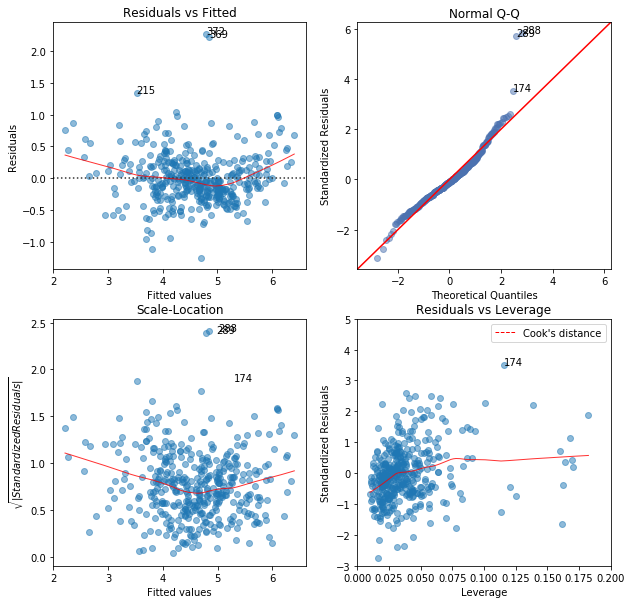

In [57]:
regression_residual_plots(model_4,'MEDV',data4)

In [58]:
#observed 174 was removed
data5 = data4[~data4.index.isin([174])]

In [59]:
data5.shape

(410, 17)

In [60]:
model_5=ols("MEDV~CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+LSTAT+AGE_sq+ZN_sq+TAX_sq+NOX_sq",data=data5).fit()

In [61]:
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     93.84
Date:                Wed, 06 May 2020   Prob (F-statistic):          8.89e-120
Time:                        19:45:15   Log-Likelihood:                -205.51
No. Observations:                 410   AIC:                             443.0
Df Residuals:                     394   BIC:                             507.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6117      1.166      3.955      0.000       2.319       6.904
CRIM          -0.0294      0.007     -4.063      0.000      -0.044      -0.015
ZN             0.0014      0.004      0.332      0.740      -0.007       0.010
INDUS         -0.0004      0.006     -0.076      0.939      -0.012       0.011
CHAS       -1.218e-13   4.44e-14     -2.742      0.006   -2.09e-13   -3.45e-14
NOX            6.3262      3.592      1.761      0.079      -0.735      13.387
RM             0.3604      0.046      7.847      0.000       0.270       0.451
AGE           -0.0070      0.004     -1.740      0.083      -0.015       0.001
DIS           -0.1014      0.022     -4.514      0.000      -0.146      -0.057
RAD            0.0291      0.008      3.647      0.000       0.013       0.045
TAX           -0.0027      0.001     -2.368      0.018      -0.005      -0.000
PTRATIO       -0.0893      0.013     -6.730      0.000      -0.115      -0.063
LSTAT         -0.0634      0.006    -11.448      0.000      -0.074      -0.053
AGE_sq      5.466e-05   3.43e-05      1.592      0.112   -1.29e-05       0.000
ZN_sq      -7.772e-06   7.03e-05     -0.111      0.912      -0.000       0.000
TAX_sq      1.763e-06   1.41e-06      1.248      0.213   -1.01e-06    4.54e-06
NOX_sq        -6.9423      2.992     -2.320      0.021     -12.825      -1.059
==============================================================================
Omnibus:                      106.974   Durbin-Watson:                   1.170
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              435.477
Skew:                           1.090   Prob(JB):                     2.74e-95
Kurtosis:                       7.554   Cond. No.                     1.03e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.48e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### NOTE: It didn't Make much difference with outier removal from 0.772 to 0.773

### 5. Multicollinearity : Correlation Matrix

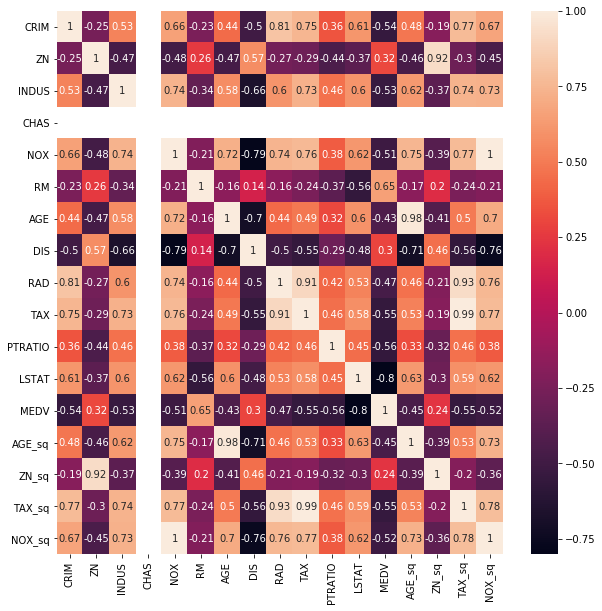

In [62]:
plt.figure(figsize=(10,10))
sns.heatmap(data5.corr(),annot=True)

In [63]:
# i remove RAD because of high correlation with CRIM
# i remove INDUS because of high correlation with TAX
#i remove NOX because of high correlation with TAX
#i remove AGE because of highy correlation with LATAT
#i remove TAX because of high correlation with RAD
data6=data5.drop(['RAD','INDUS','NOX','AGE','TAX'],axis=1)

In [64]:
data6.head()

,CRIM,ZN,CHAS,RM,DIS,PTRATIO,LSTAT,MEDV,AGE_sq,ZN_sq,TAX_sq,NOX_sq
1,0.00632,18.0,0,6.575,4.0900,15.3,4.98,4.898979,4251.04,324.0,87616,0.289444
2,0.02731,0.0,0,6.421,4.9671,17.8,9.14,4.647580,6225.21,0.0,58564,0.219961
3,0.02729,0.0,0,7.185,4.9671,17.8,4.03,5.890671,3733.21,0.0,58564,0.219961
4,0.03237,0.0,0,6.998,6.0622,18.7,2.94,5.779273,2097.64,0.0,49284,0.209764
5,0.06905,0.0,0,7.147,6.0622,18.7,5.33,6.016644,2937.64,0.0,49284,0.209764


In [65]:
model_6=ols("MEDV~CRIM+ZN+CHAS+RM+DIS+PTRATIO+LSTAT+AGE_sq+ZN_sq+TAX_sq+NOX_sq",data=data6).fit()

In [66]:
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     130.6
Date:                Wed, 06 May 2020   Prob (F-statistic):          3.47e-119
Time:                        19:45:17   Log-Likelihood:                -219.38
No. Observations:                 410   AIC:                             460.8
Df Residuals:                     399   BIC:                             504.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3533      0.444     12.067      0.000       4.481       6.225
CRIM          -0.0146      0.007     -2.232      0.026      -0.027      -0.002
ZN             0.0031      0.004      0.711      0.478      -0.005       0.012
CHAS       -3.522e-13   3.21e-14    -10.983      0.000   -4.15e-13   -2.89e-13
RM             0.3957      0.046      8.611      0.000       0.305       0.486
DIS           -0.1058      0.020     -5.216      0.000      -0.146      -0.066
PTRATIO       -0.0832      0.014     -6.146      0.000      -0.110      -0.057
LSTAT         -0.0638      0.006    -11.273      0.000      -0.075      -0.053
AGE_sq     -7.676e-06   1.07e-05     -0.718      0.473   -2.87e-05    1.33e-05
ZN_sq      -6.275e-05    7.1e-05     -0.884      0.377      -0.000    7.68e-05
TAX_sq     -9.413e-08    2.6e-07     -0.362      0.718   -6.05e-07    4.17e-07
NOX_sq        -1.2408      0.410     -3.023      0.003      -2.048      -0.434
==============================================================================
Omnibus:                      126.648   Durbin-Watson:                   1.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              662.541
Skew:                           1.221   Prob(JB):                    1.35e-144
Kurtosis:                       8.729   Cond. No.                     5.35e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.27e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### let me remove variables with p value>0.05 for not being statistically signficant

In [67]:
data7=data6.drop(['ZN_sq','AGE_sq','ZN'],axis=1)

In [68]:
data7.head()

,CRIM,CHAS,RM,DIS,PTRATIO,LSTAT,MEDV,TAX_sq,NOX_sq
1,0.00632,0,6.575,4.0900,15.3,4.98,4.898979,87616,0.289444
2,0.02731,0,6.421,4.9671,17.8,9.14,4.647580,58564,0.219961
3,0.02729,0,7.185,4.9671,17.8,4.03,5.890671,58564,0.219961
4,0.03237,0,6.998,6.0622,18.7,2.94,5.779273,49284,0.209764
5,0.06905,0,7.147,6.0622,18.7,5.33,6.016644,49284,0.209764


In [69]:
model_7=ols("MEDV~CRIM+CHAS+RM+DIS+PTRATIO+LSTAT+TAX_sq+NOX_sq",data=data7).fit()

In [70]:
model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     187.2
Date:                Wed, 06 May 2020   Prob (F-statistic):          2.84e-122
Time:                        19:45:17   Log-Likelihood:                -220.04
No. Observations:                 410   AIC:                             456.1
Df Residuals:                     402   BIC:                             488.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3926      0.438     12.317      0.000       4.532       6.253
CRIM          -0.0141      0.006     -2.173      0.030      -0.027      -0.001
CHAS        6.542e-16   2.21e-16      2.959      0.003    2.19e-16    1.09e-15
RM             0.3906      0.044      8.782      0.000       0.303       0.478
DIS           -0.0989      0.017     -5.810      0.000      -0.132      -0.065
PTRATIO       -0.0852      0.012     -6.852      0.000      -0.110      -0.061
LSTAT         -0.0652      0.005    -12.642      0.000      -0.075      -0.055
TAX_sq     -1.011e-07   2.54e-07     -0.397      0.691   -6.01e-07    3.99e-07
NOX_sq        -1.2904      0.389     -3.320      0.001      -2.054      -0.526
==============================================================================
Omnibus:                      122.094   Durbin-Watson:                   1.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              608.824
Skew:                           1.187   Prob(JB):                    6.24e-133
Kurtosis:                       8.477   Cond. No.                     1.50e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.18e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## N.B: model_5 is the best one with the accuracy of 0.773